<a href="https://colab.research.google.com/github/janet12041/RPAA/blob/main/RPAA_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 3: Normalización, Funciones de activación, EarlyStopping, Red Neuronal, Artificial Multicapa

###Janet Illescas Coria

Desarrolla un clasificador binario utilizando el conjunto de datos MNIST. El objetivo es diferenciar entre dígitos que son ”cincos” (clase 1) y dígitos que ”no son cincos” (clase 0). Se debe implementar una red neuronal artificial multicapa con las siguientes características:

1. Preparación de Datos:

In [18]:
from keras.datasets import mnist
import numpy as np

def balanced_mnist_set():

  # Utilizar la base de datos MNIST.
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  # Normalizar los datos para escalarlos entre 0 y 1.
  x_train = x_train / 255
  x_test  = x_test / 255

  # Balancear los datos para tener aproximadamente el mismo número de
  # cincos y dígitos que no son cincos.
  idx_y_train_5 = np.where(y_train == 5)[0]
  idx_y_train_n5 = np.where(y_train != 5)[0]
  idx_y_train_n5 = np.random.choice(idx_y_train_n5, idx_y_train_5.shape[0], replace=False)

  idx_y_train = np.concatenate([idx_y_train_5, idx_y_train_n5])
  np.random.shuffle(idx_y_train)

  x_train = x_train[idx_y_train]
  y_train = y_train[idx_y_train]

  idx_y_test_5 = np.where(y_test == 5)[0]
  idx_y_test_n5 = np.where(y_test != 5)[0]
  idx_y_test_n5 = np.random.choice(idx_y_test_n5, idx_y_test_5.shape[0], replace=False)

  idx_y_test = np.concatenate([idx_y_test_5, idx_y_test_n5])
  np.random.shuffle(idx_y_test)

  x_test = x_test[idx_y_test]
  y_test = y_test[idx_y_test]

  y_train_binary = (y_train == 5).astype(int)
  y_test_binary = (y_test == 5).astype(int)

  return (x_train, y_train_binary), (x_test, y_test_binary)


2. Implementar una red neuronal multicapa con las siguientes especificaciones::



In [19]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

(x_train, y_train_binary), (x_test, y_test_binary) = balanced_mnist_set()

# Modelo de red neuronal con dos neuronas en la primera capa
# y una neurona en la segunda capa (salida).
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])


3. Entrenamiento del Modelo:

In [20]:
from keras.callbacks import EarlyStopping

# Utilizar Early Stopping monitoreando la métrica que consideres adecuada
# (por ejemplo accuracy o loss).
callback = EarlyStopping(monitor='accuracy', patience=4, restore_best_weights=True)


model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Elegir los hiperparámetros para batch size y validation split que consideres adecuados.
history = model.fit(x_train, y_train_binary, epochs=100, verbose=0,
                    batch_size=200, validation_split=0.2, callbacks=[callback])

4. Evaluación del Modelo:

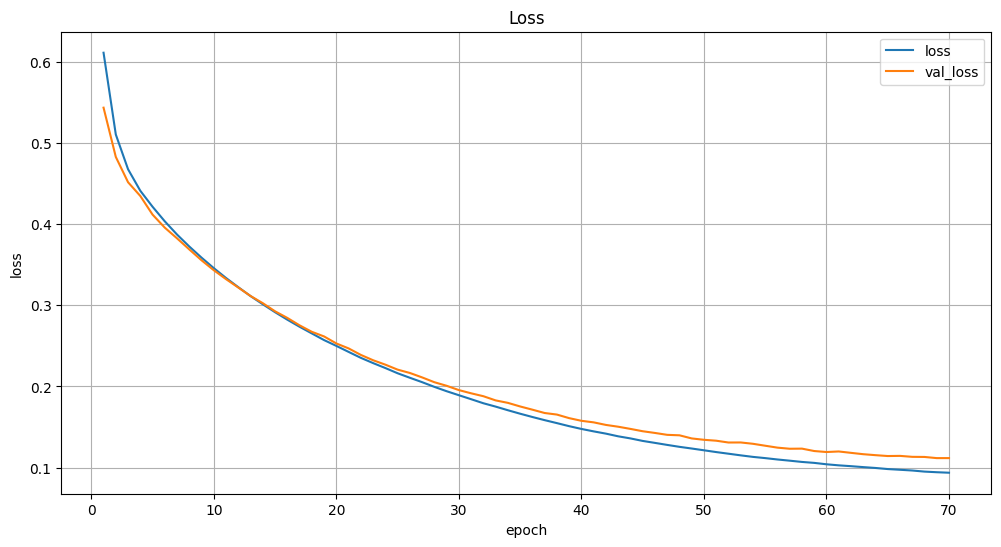

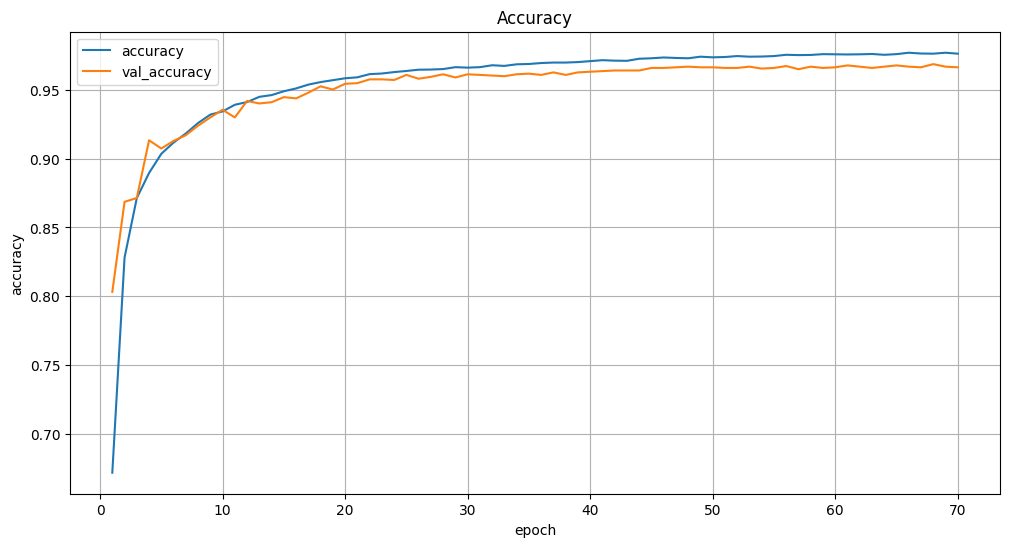

In [21]:
import matplotlib.pyplot as plt

# Graficar el històrico de accuracy y loss para el entrenamiento y validación.
loss_train = history.history['loss']
loss_val = history.history['val_loss']
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1, len(loss_train) + 1)

# Loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_train, label='loss')
plt.plot(epochs, loss_val, label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy_train, label='accuracy')
plt.plot(epochs, accuracy_val, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

56/56 [==============================] - 0s 840us/step
59


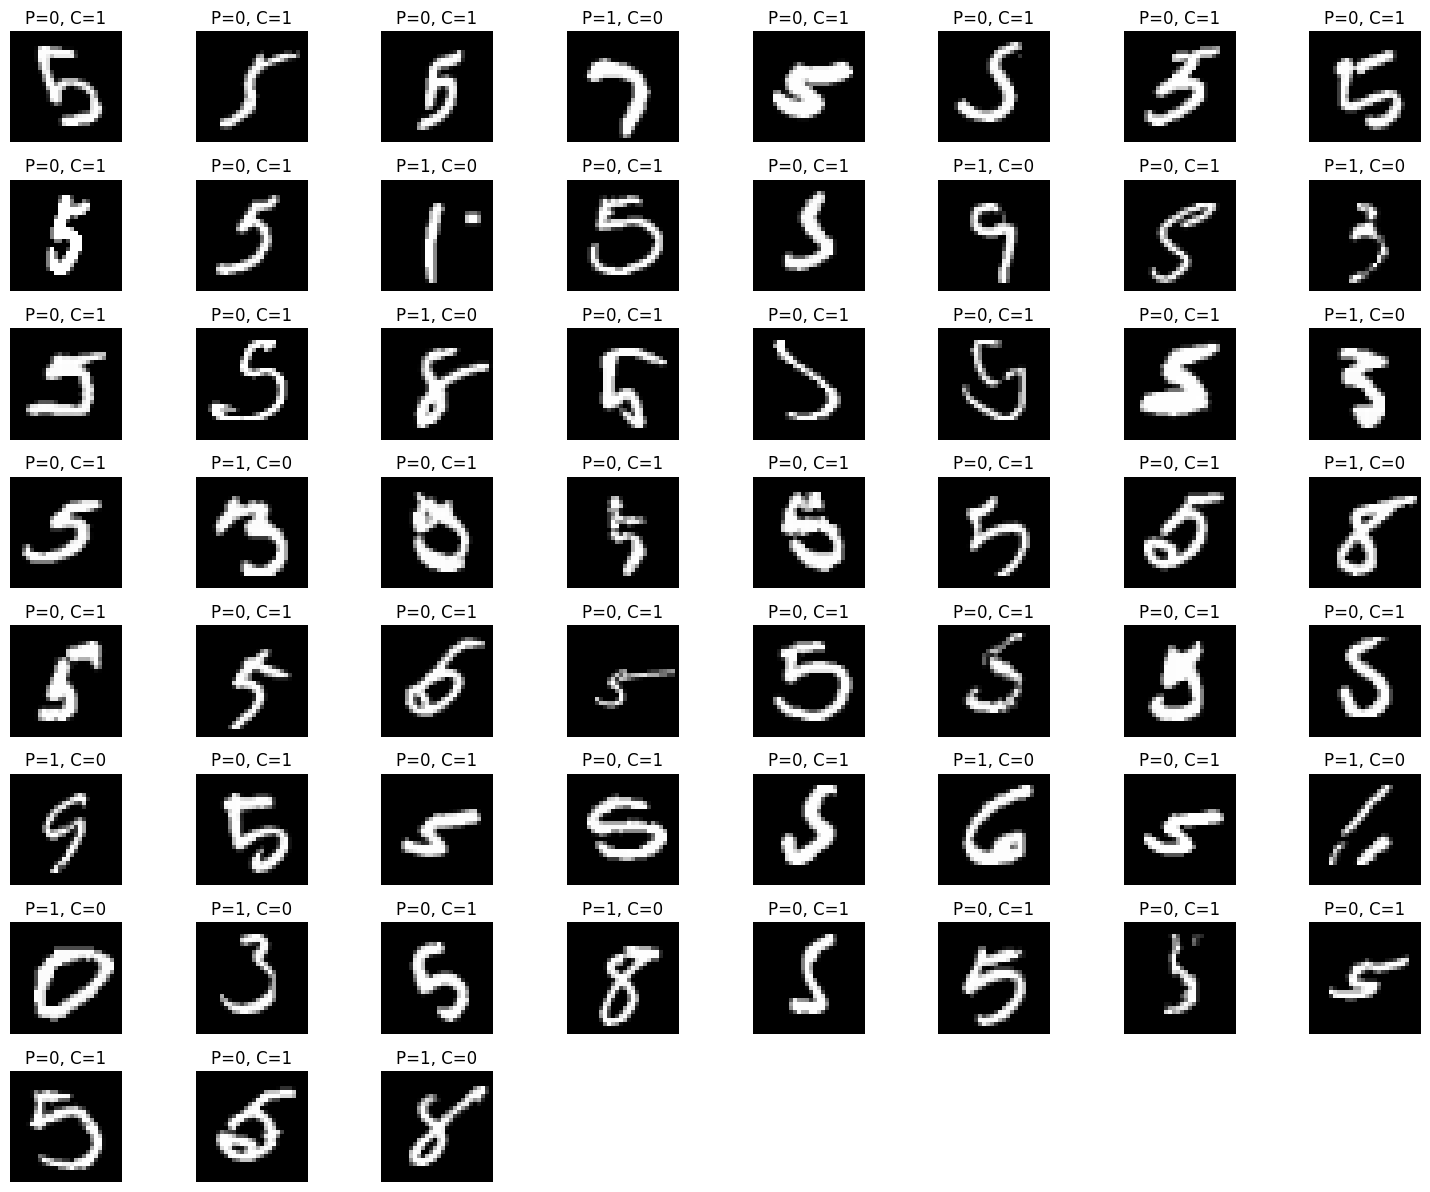

In [22]:
# Predicciones a evaluar
y_pred = (model.predict(x_test) >= 0.5).astype(int)[:,0]

# Muestra las imágenes de al menos 80 errores de clasificación del modelo.
incorrect_indices = np.nonzero(y_pred != y_test_binary)[0]
n_errors= min(80, len(incorrect_indices))
print(len(incorrect_indices))
plt.figure(figsize=(15,15))
for i, incorrect in enumerate(np.random.choice(incorrect_indices, n_errors, False)):
    plt.subplot(10,8,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("P={}, C={}".format(y_pred[incorrect], y_test_binary[incorrect]))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Reportar accuracy, precisión, recall y f1-score para ambas clases.
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1_s = f1_score(y_test_binary, y_pred)
precision_0 = precision_score(y_test_binary, y_pred, pos_label=0)
recall_0 = recall_score(y_test_binary, y_pred, pos_label=0)
f1_s_0 = f1_score(y_test_binary, y_pred, pos_label=0)

print()
print("Accuracy: ", accuracy)
print("Precision_1: ", precision)
print("Recall_1: ", recall)
print("F1-score_1: ", f1_s)
print("Precision_0: ", precision_0)
print("Recall_0: ", recall_0)
print("F1-score_0: ", f1_s_0)


Accuracy:  0.9669282511210763
Precision_1:  0.9826187717265353
Recall_1:  0.9506726457399103
F1-score_1:  0.9663817663817664
Precision_0:  0.9522258414766558
Recall_0:  0.9831838565022422
F1-score_0:  0.9674572531715389


5. Punto extra: Grafica la curva ROC de tu modelo, obtén el área sobre la
curva ROC (qué les indica este valor), y determina el umbral que usarías
(justifica tu respuesta).

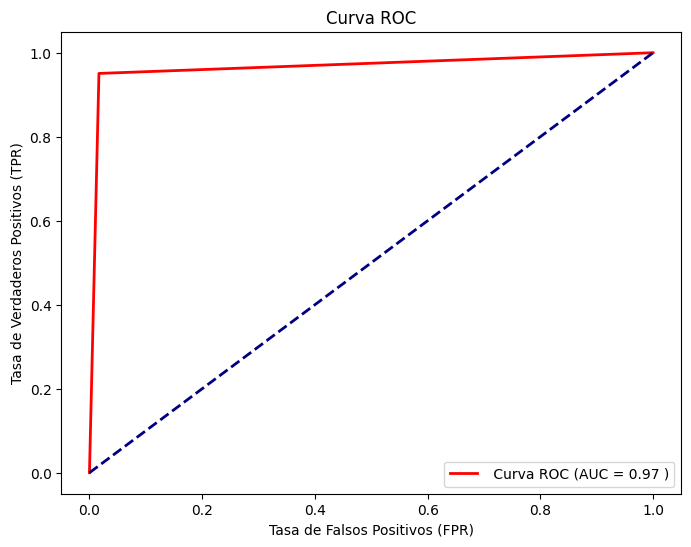

AUC Score: 0.9669282511210763


In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, umbrales = roc_curve(y_test_binary, y_pred)
auc = roc_auc_score(y_test_binary, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f' Curva ROC (AUC = {auc:.2f} )')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", auc)

El área bajo la curva (AUC) nos ha arrojado como reusltado 0.96, lo cual nos indica que el modelo tiene un buen rendimiento, y por lo tanto distigue bien, en la mayoría de los casos, entre las 2 clases.

En base a este resultado, se podría tomar el umbral que corresponde al punto de la curva ROC más cercano al ángulo superior izquierdo (0,1), el cual representa un buen equilibrio entre la sensibilidad (TPR) y la especificidad (1-FPR)